<a href="https://colab.research.google.com/github/Sudorenkoroma/HW_GI_ML/blob/main/Hw2_3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "/content/bestsellers with categories.csv"
df = pd.read_csv(url)


In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

відповідь: дані датасет зберігає 550 книг

Чи є в якихось змінних пропуски?

In [ ]:
missing_data = df.isna().sum()
missing_data

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

відповідь: ні

Які є унікальні жанри?

In [ ]:
unique_genres = df['genre'].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: Non Fiction, Fiction

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна

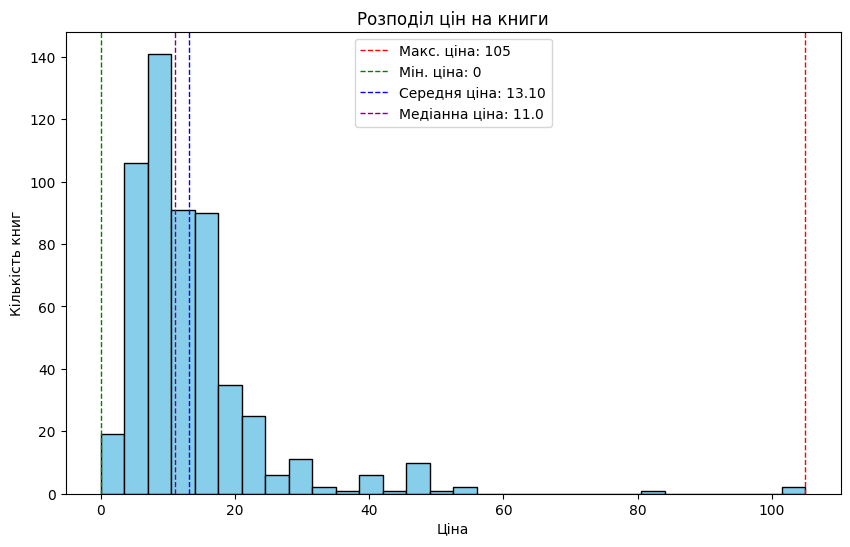

In [ ]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')

plt.axvline(max_price, color='red', linestyle='dashed', linewidth=1, label=f'Макс. ціна: {max_price}')
plt.axvline(min_price, color='green', linestyle='dashed', linewidth=1, label=f'Мін. ціна: {min_price}')
plt.axvline(mean_price, color='blue', linestyle='dashed', linewidth=1, label=f'Середня ціна: {mean_price:.2f}')
plt.axvline(median_price, color='purple', linestyle='dashed', linewidth=1, label=f'Медіанна ціна: {median_price}')

plt.legend()
plt.show()

*   Макс. ціна: 105
*   мін. ціна: 0
*   середня ціна: 13.10
*   медіанна ціна: 11.0

In [ ]:
highest_rating = df['user_rating'].max()
highest_rating

4.9

Який рейтинг у датасеті найвищий? Відповідь:4,9

In [ ]:
books_with_highest_rating = df[df['user_rating'] == highest_rating].shape[0]
books_with_highest_rating

52

Скільки книг мають такий рейтинг? Відповідь:52

In [ ]:
book_with_most_reviews = df.loc[df['reviews'].idxmax(), 'name']
book_with_most_reviews

'Where the Crawdads Sing'

Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing"

In [12]:
most_expensive_2015 = df[(df['year'] == 2015) & (df['price'] > 0)].nlargest(1, 'price')['name'].iloc[0]
most_expensive_2015

'Publication Manual of the American Psychological Association, 6th Edition'

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"

In [13]:
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
fiction_books_2010

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:20

In [14]:
books_4_9_in_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
books_4_9_in_2010_2011

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:1

In [15]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price', ascending=True)
last_book_in_sorted_list = sorted_books_2015_under_8.iloc[-1]['name']
last_book_in_sorted_list

'Old School (Diary of a Wimpy Kid #10)'

Яка книга остання у відсортованому списку? Відповідь: "Old School (Diary of a Wimpy Kid #10)"

In [16]:
genre_price_stats = df.groupby('genre')['price'].agg(min_price='min', max_price='max')
genre_price_stats

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105


*   Максимальна ціна для жанру Fiction: 82
*   Мінімальна ціна для жанру Fiction: 0
*   Максимальна ціна для жанру Non Fiction: 105
*   Мінімальна ціна для жанру Non Fiction: 0


In [18]:
author_book_count = df.groupby('author')['name'].agg(book_count='count').sort_values(by='book_count', ascending=False)
author_book_count

,book_count
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1
David McCullough,1




*   Якої розмірності вийшла таблиця? Відповідь: 248 х 1
*   Який автор має найбільше книг? Відповідь:Jeff Kinney
*   Скільки книг цього автора? Відповідь:12






In [20]:
author_rating_mean = df.groupby('author')['user_rating'].agg(average_rating='mean').sort_values(by='average_rating', ascending=False)
author_rating_mean

,average_rating
author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
...,...
Paula Hawkins,4.1
Muriel Barbery,4.0
Gillian Flynn,4.0


*   У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
*   Який у цього автора середній рейтинг? Відповідь: 3.9

In [22]:
author_stats = pd.concat([author_book_count, author_rating_mean], axis=1)
sorted_author_stats = author_stats.sort_values(by=['book_count', 'average_rating'])
sorted_author_stats

,book_count,average_rating
author,,
Muriel Barbery,1,4.000000
Pierre Dukan,1,4.100000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Rob Bell,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? відповідь: Muriel Barbery